# Activation Functions

Again some important import statements

In [1]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
import seaborn as sns
sns.set()

In [2]:
SEED = 42

np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

Using device cuda:0


Let's first code some activation functions in PyTorch

In [3]:
def relu(x):
    return x * (x > 0)

def elu(x):
    return torch.where(x > 0, x, torch.exp(x)-1)

def swish(x):
    return x * torch.sigmoid(x)

We can also write an function to get their gradients

In [4]:
def get_grads(act_fn, x):
    x = x.clone().requires_grad_()
    out = act_fn(x)
    out.sum().backward()
    return x.grad

Let's now visualize them

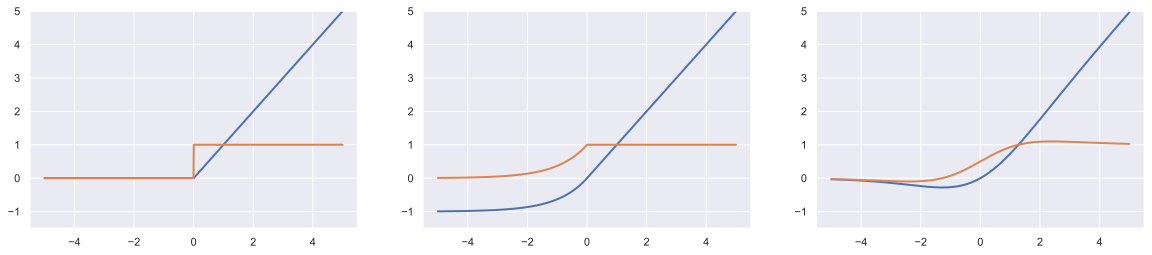

In [5]:
def vis_act_fn(act_fn, ax, x):
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    ax.plot(x, y, linewidth=2)
    ax.plot(x, y_grads, linewidth=2)
    ax.set_ylim(-1.5, x.max())

act_fns = [relu, elu, swish]
x = torch.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, len(act_fns), figsize=(20, 4))
for i, act_fn in enumerate(act_fns):
    vis_act_fn(act_fn, ax[i], x)
plt.show()